#### Student : Sanzhar Sailaubek                           

#### Teacher : Aidana Zhalgas




# Videogaming industry analysis 



## Introduction

Every year, video games are becoming an integral part of our world. Since 1976, the first console games began to appear on the Atari 2600 platform. To this day, games are released on the latest consoles and platforms such as Nintendo Switch, PS5, Xbox.



Video games are currently the largest industry, generating billions in revenue for gaming companies. The global gaming market was valued at USD 151.55 billion in 2019 and is expected to reach USD 256.97 billion by 2025, with a CAGR of 9.17% over the forecast period (2020-2025). Also, in the next dataset, you can see which platforms and game genres are in high demand by gamers.



# **Objectives**




Since I was interested in the video game industry since childhood, I decided to choose a dataset related to the history and sale of games. This dataset has 11 columns, where we release statistics on sales of games (in millions of dollars) and platforms that have been released since 1980. 




In this dataset, three main countries that release games were identified, which are Japan, North America and Europe.     So , Electronic Arts, Ubisoft, KONAMI, etc. are located in these countries.


1.I want to show you how history of videogames was formed by its production and what games were actual from 1980 to 2020 . 

2.What is the distribution of countries' sales and what type of correlation do dataset's columns do have between each other .

3.Show what countries' preferences in terms of genre of games in different regions






**I hope you enjoy what you saw and you will learn a lot of new things for yourself. !**

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [132]:

import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
%matplotlib inline


#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from IPython.display import display, HTML

In [133]:
vgdata = pd.read_csv('vgsales.csv')
vgdata.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# DATA DESCRIPTION

In [5]:
vgdata.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


general description of dataset's columns 

In [6]:
print("Database dimension     :",vgdata.shape)
print("Database size          :",vgdata.size)

#columns and rows
#size of dataset

Database dimension     : (16598, 11)
Database size          : 182578


In [7]:
vgdata.info()
#information regarding its column description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [138]:
print(f"Number of Years in the dataset: {vgdata['Year'].nunique()}")
print(f"Max year in the dataset: {vgdata['Year'].max()}")
print(f"Min year in the dataset: {vgdata['Year'].min()}")

Number of Years in the dataset: 39
Max year in the dataset: 2020.0
Min year in the dataset: 1980.0


In [8]:
vgdata=vgdata.dropna()
vgdata

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Cleaning dataset out of null values for future research

In [9]:
len(vgdata["Rank"].unique())

16291

Number of unique rows after cleaning

In [140]:
games_names = vgdata['Name'].unique()
publisher_names = vgdata['Publisher'].unique()
platforms_names = vgdata['Platform'].unique()
genres_names = vgdata['Genre'].unique()


In [142]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    value = len(games_names),
    title = {'text': "Games",'font': {'color': 'black','size':22}},
    number={'font':{'color': 'black','size':50}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    value = len(publisher_names),
    title = {'text': "Publishers",'font': {'color': 'red','size':22}},
    number={'font':{'color': 'red','size':50}},
    domain = {'row': 0, 'column': 1}
))
fig.add_trace(go.Indicator(
    value = len(platforms_names),
    title = {'text': "Platforms",'font': {'color': 'brown','size':22}},
    number={'font':{'color': 'brown','size':50}},
    domain = {'row': 0, 'column': 2}
))

fig.add_trace(go.Indicator(
    value = len(genres_names),
    title = {'text': "Genres",'font': {'color': 'blue','size':22}},
    number={'font':{'color': 'blue','size':50}},
    domain = {'row': 0, 'column': 3}
))

fig.update_layout(
    grid = {'rows': 1, 'columns': 4})
fig.show()

Show all unique values that exist in my dataset

# RESEARCH QUESTIONS

#1

**As you could see on previous cell we have 12 different genres of games . Each of them have own numbers of games and it is completely possible for us to observe the determination of those genres in our dataset from 1980 to 2020**

*I want to see their distribution and percentage and the most popular genre*

#2

**Nintendo , Microsoft Game studios , Sony computer entertainment , Electronic arts , Konami are
the largest companies around the world by revenue , that in sum have income exceeding  7 billion $**

*I want to see progress of those companies starting since 2008 and observe what incomes they did have in the past decade*.


#3

**We know that every game has its own genre . Sports , action , racing and many others. For the sake of research I want to explore what genres are the most leading in countries that are represented in our dataset.** 

*So , by this we can observe what genres of games are mostly interesting for people from different parts of the world*


#4

**Every year of gaming industry has its own number of sales and incomes that was earn from gamers purchases in general in one year . So, my dataset allows me to count the common sales of every game every year .**

*Consequently , I want to know which year of gaming was the most successful in its history*


#5

**In my dataset I have 11 columns and each of them are having different numbers and values.**

*However , via correlation I want to know what values of my dataset are having greater coefficient of correlation . Let’s observe*


# DATA PREPARATION AND VISUALISATION

In [75]:
vgdata.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [76]:
vgdata.sort_values('Global_Sales',ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 5.1 Pie chart on finding what genres of games are mostly presented

In [127]:
genresandgames=  vgdata.groupby('Genre')['Name'].count().reset_index().sort_values("Name",ascending=False)
genresandgames = genresandgames.reset_index()
genresandgames.drop("index",axis = 1,inplace=True)

#data preparation 


First of all we should do grouping by genre, and count the number of appearances in dataset , so we can plot it on the graph . 

In [147]:
fig = go.Figure([go.Pie(labels=genresandgames['Genre'], 
                        values=genresandgames['Name'],
                        hole=0.3)])  
fig.update_traces( textinfo='percent', textfont_size=15)
fig.update_layout(title="Genre Games distribution")
fig.show()

Using plotly library in order to showing data of our pie chart with extracting percentages and their special colors on graph.

# 5.2 Top 5 publishers' incomes every year since 2006

In [116]:

#data preparation 

top_5_publishers = ['Nintendo', 'Sony Computer Entertainment','Microsoft Game Studios','Konami Digital Entertainment','Electronic Arts']
publ = vgdata.loc[:,["Year","Publisher",'Global_Sales']]
publ['total_sales'] = publ.groupby([publ.Publisher,publ.Year])['Global_Sales'].transform('sum')
publ.drop('Global_Sales', axis=1, inplace=True)
publ = publ.drop_duplicates()
publ = publ[(publ['Year']>=2006)]
publ = publ.sort_values("Year",ascending = False)
publ = publ.loc[publ['Publisher'].isin(top_5_publishers)]
publ = publ.sort_values("Year")


Creating list from 5 companies that we want to explore in this task . Then sorting it to make it start from 2006 and do apply many other in order having clear result with any duplicates . 

In [122]:
#data visualisation

fig=px.bar(publ,x='Publisher', y="total_sales", animation_frame="Year", 
           animation_group="Publisher", color="Publisher", hover_name="Publisher",range_y=[0,200])
fig.update_layout(title_text="Top 5 Publisher Game Sale by Year", xaxis_domain=[0.05, 1.0])
fig.show()

In this question I did use px.bar in order to show progress with scrolling right and left button to see distribution. X-axis(0.05 to 1) here is 'Publisher' column , while y-axis(0,200) is for total_sales. 

In [50]:
publishers = vgdata[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
publishers = publishers.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
publishers.style.set_properties(**{'background-color': 'lightgreen'}, subset=['Global_Sales'])  

,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,815.750000,418.300000,454.990000,1784.430000
1,Electronic Arts,584.220000,367.380000,13.980000,1093.390000
2,Activision,426.010000,213.720000,6.540000,721.410000
3,Sony Computer Entertainment,265.220000,187.550000,74.100000,607.280000
4,Ubisoft,252.810000,163.030000,7.330000,473.540000
5,Take-Two Interactive,220.470000,117.950000,5.830000,399.300000
6,THQ,208.600000,94.600000,5.010000,340.440000
7,Konami Digital Entertainment,88.910000,68.620000,90.930000,278.560000
8,Sega,108.780000,81.410000,56.190000,270.700000
9,Namco Bandai Games,69.380000,42.610000,126.840000,253.650000


# 5.3 Sales per genre in four different regions 

In [105]:
genreLabel = vgdata.groupby('Genre')

na_sales_by_genre = genreLabel['NA_Sales'].sum().reset_index()
eu_sales_by_genre = genreLabel['EU_Sales'].sum().reset_index()
jp_sales_by_genre = genreLabel['JP_Sales'].sum().reset_index()
global_sales_by_genre = genreLabel['Global_Sales'].sum().reset_index()

#data preparation 


By preparing data above firstly , we sorting genres appearance and regions' sales around those genres. By summing up and reset_index() function

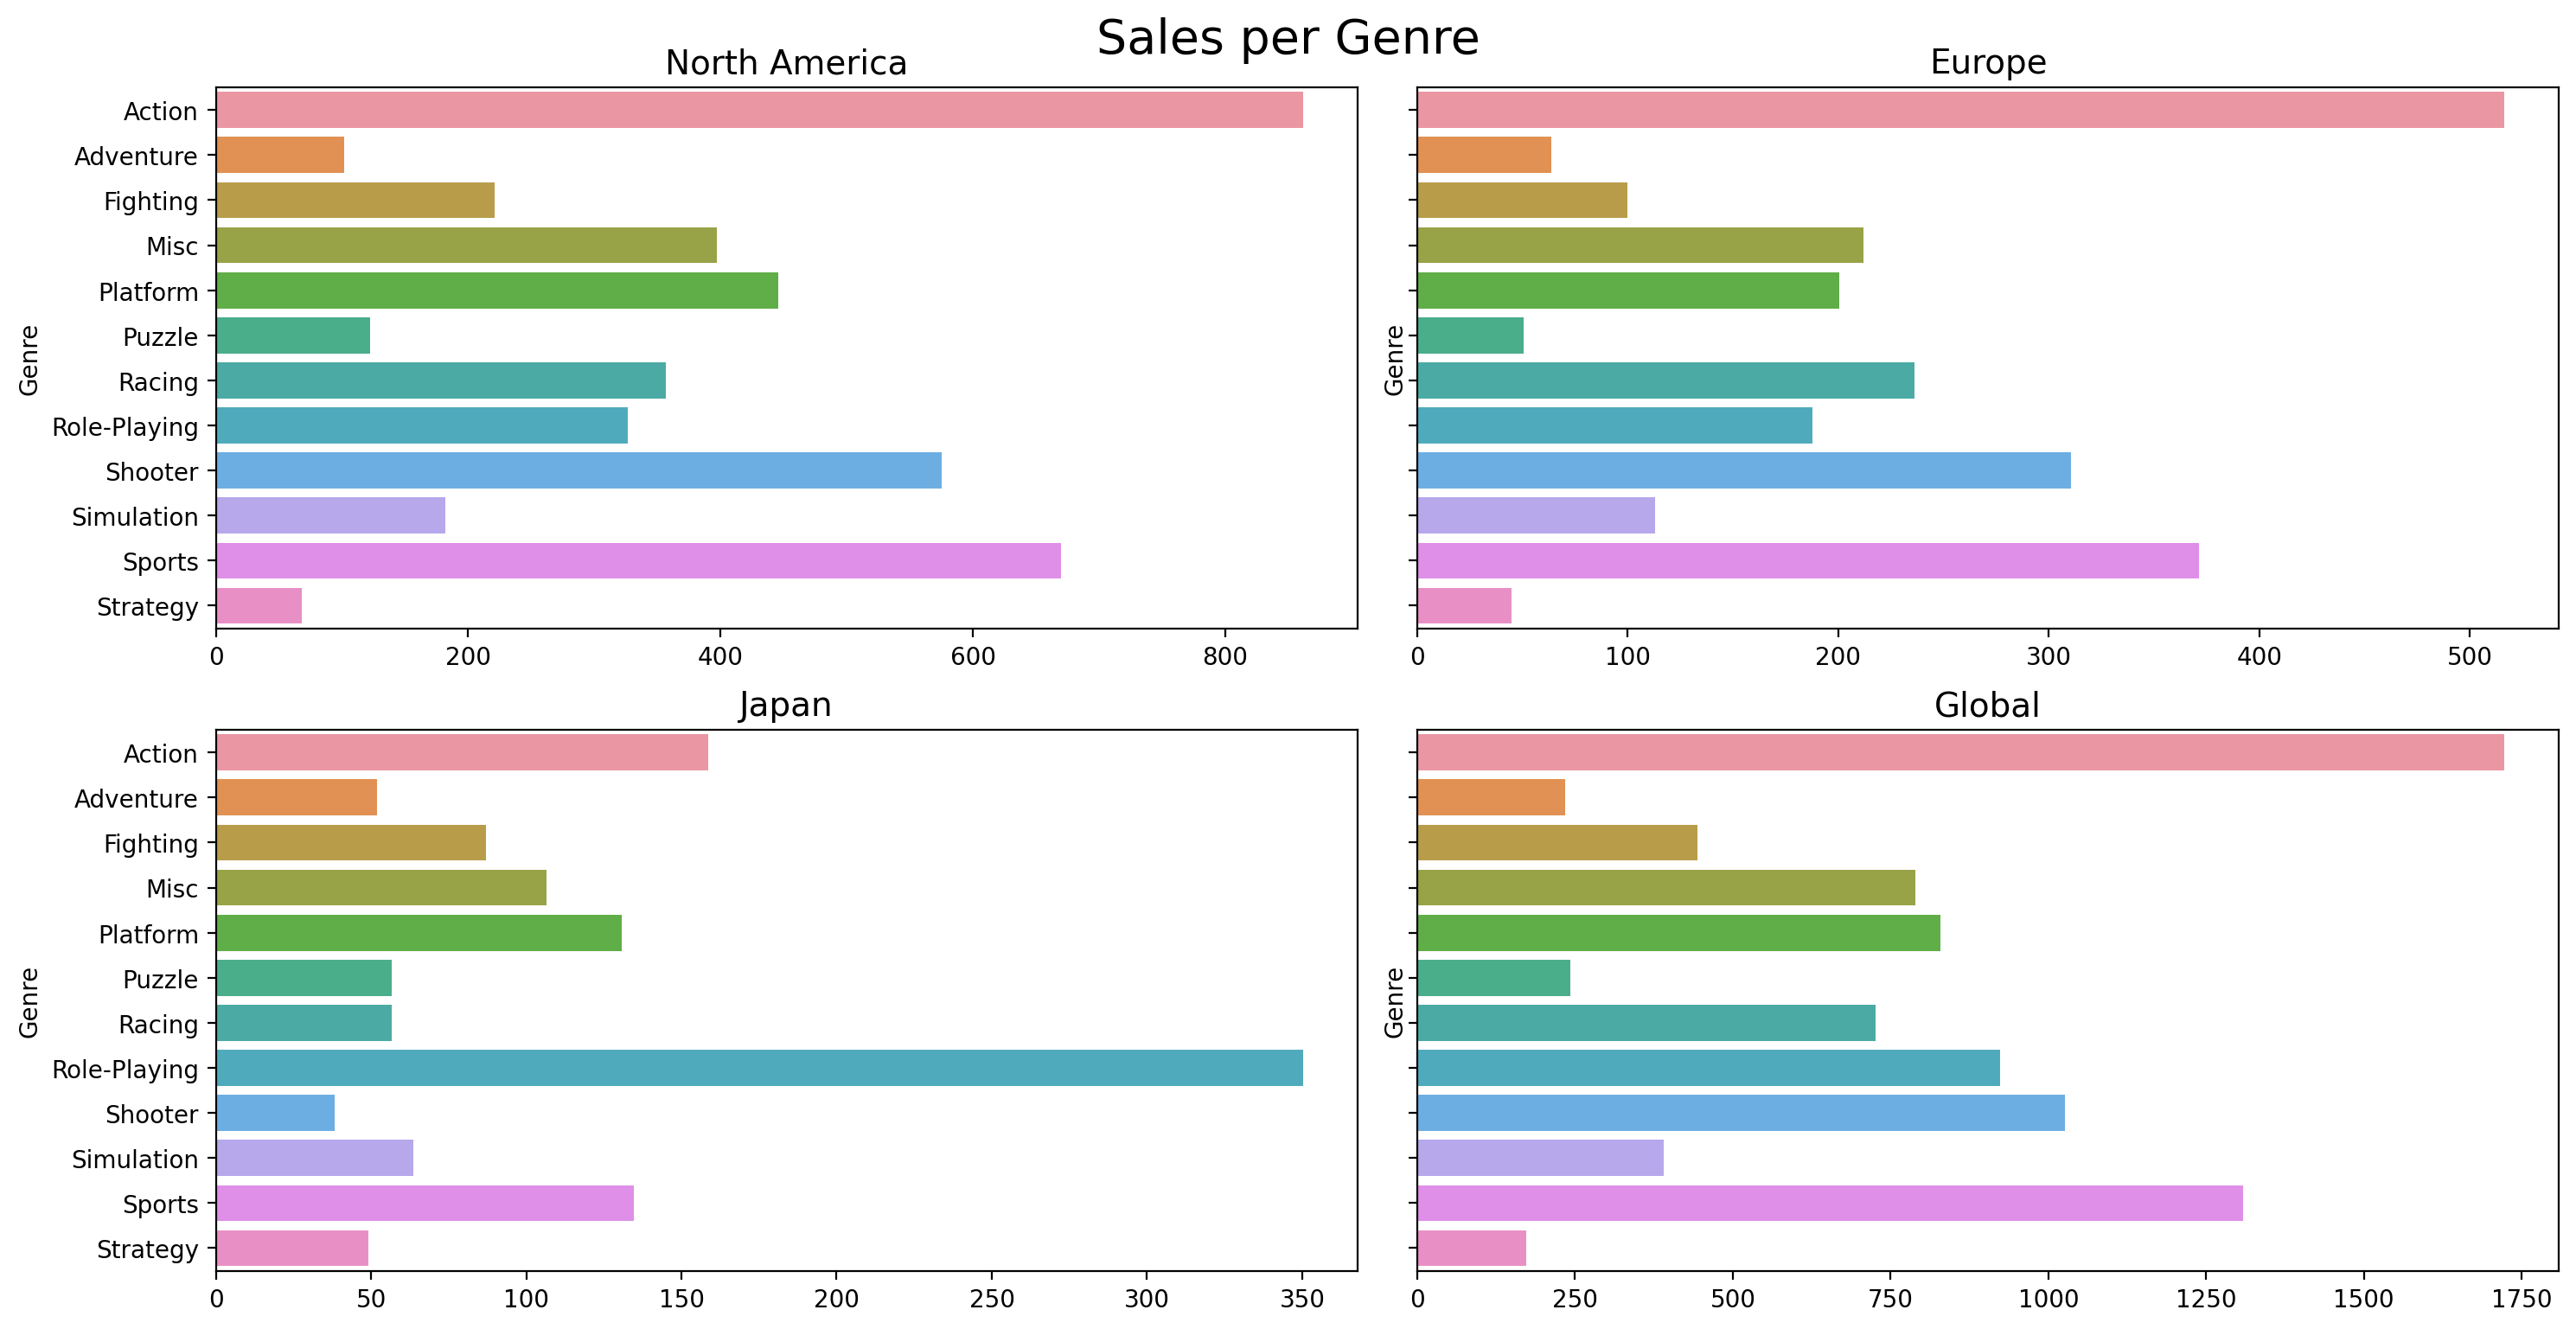

In [106]:


fig, axes = plt.subplots(2,2, figsize=(15,8), dpi=200, sharey=True)
fig.suptitle('Sales per Genre', fontsize=20)

sns.barplot(ax=axes[0][0], data=na_sales_by_genre, y='Genre', x='NA_Sales')
sns.barplot(ax=axes[0][1], data=eu_sales_by_genre, y='Genre', x='EU_Sales')
sns.barplot(ax=axes[1][0], data=jp_sales_by_genre, y='Genre', x='JP_Sales')
sns.barplot(ax=axes[1][1], data=global_sales_by_genre, y='Genre', x='Global_Sales')
plt.tight_layout()


fontsize = 14
labels = [['North America', 'Europe'], ['Japan', 'Global']]
for x in range(2):
    for y in range(2):
        axes[x][y].set_title(labels[x][y], fontsize=fontsize)
        axes[x][y].set_xlabel('')
        
#data visualisation


In the visualization part I applied 2 on 2 subplot , with taking into account all of those shapes and labeling all of those graphs correctly . For titling to this graphs' names is responsible for loops that I used .

# 5.4 Global sales per year of all games

In [99]:
df_year = vgdata.groupby('Year').sum().reset_index(drop=False)

# Plot parameters 
figsize = [20, 7]
x = df_year['Year']
y = df_year['Global_Sales']
width = 0.8
color = 'purple'

#data preparation 


First of all apply groupby method by value 'Year' and summing up all values in the columns , so then we can extract our data for bars. X-axis is for 'Year' column , y-axis for 'Global_Sales'.

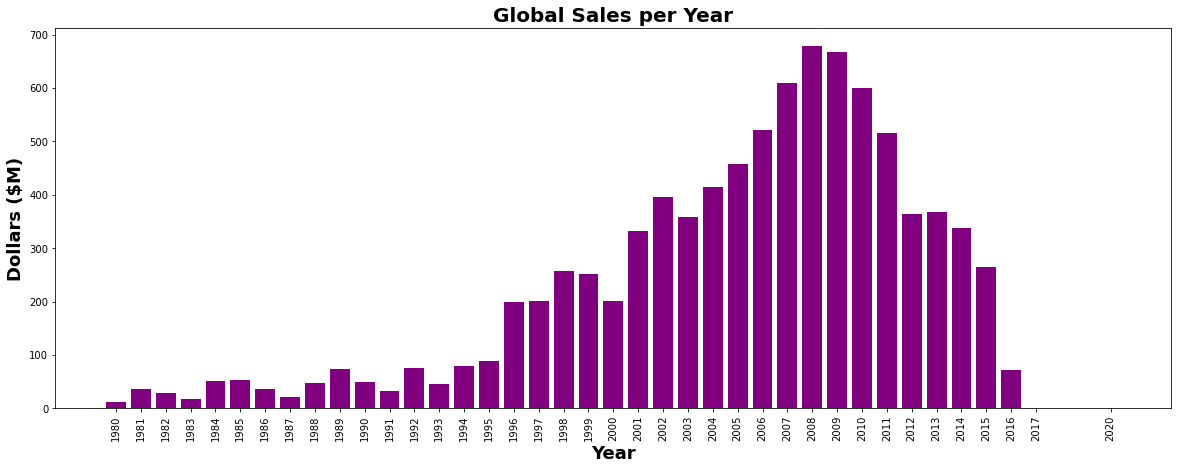

In [100]:
plt.figure(figsize=figsize)
bars = plt.bar(x, y, 
               width=width, 
               color=color)

# Non-data objects
plt.title('Global Sales per Year', fontdict={'fontweight':'bold', 'fontsize':20})    
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Dollars ($M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(df_year['Year'], rotation = 90)

plt.show()

#data visualisation


In the shown bar chart are used some styling for the design of bars and its revealed 20 values of the bars , that are representing years of my dataset . As y-axis I had incomes for my years representation , where 700 is peak .

# 5.5 Correlation table and columns' connection

In [64]:
corrmat = vgdata.corr()
corr_features = corrmat.index

#data preparation 


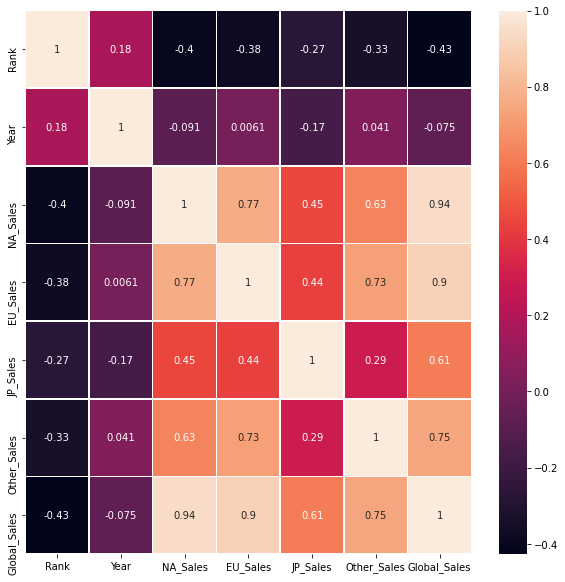

In [72]:

plt.figure(figsize=(10,10))
#Plotting heat map
g=sns.heatmap(vgdata[corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() # Finding the values for bottom and top
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

#data visualisation


From following correlation table you can observe correlating values from -0.4 to 1.0 . I used here method of sns library heatmap , where the darkest colors are negative correlation and the brightest colors are positive and strong positive ones. Figure size is 10 on 10 .

# CONCLUSION

**So , by concluding things that we've done in the previous cells and analyzing all the result we got from coding , we can surely answer to the research questions that we had previously**

#1

**With concluding data given in dataset and finding distriubtion for genres , it became Known that the most popular genre of games among 12 genres is action , that was presented as 20% figure in chart**

#2

**Top 5 publishers(Nintendo , Microsoft Game studios , Sony computer entertainment , Electronic arts , Konami) of gaming became not so popular as they did before 2008.In their actual income in 2016 they did earn only 25 million in sum . But previously they showed results that are 10 times greater in 2006 with revenue of 270 million dollars (-245 million $)**

#3

**As you could observe from 3rd task , I created four charts that were designed for EU,JP,NA,Global and their the most popular genres . So by presented data we could obviously say that the most popular genres in those regions are following :**

+ NA-Action

+ EU-Action

+ JP-Role-playing games

+ Global-Action

#4

**In the following bar chart called 'Global sales per year' , where we did observe sales of games in different years from 1980 to 2020 , we can surely say that the most successful year of gaming sales was 2008 , where figure reached peak 680 million dollars.**

#5

**In the correlation table that we analyzed in fifth task , you can see that most of the values somehow interconnected to each other . We can divide levels of correlation as following .**

+ 0.8-1.0 -   **Very strong positive (NA_sales-Global_sales, EU_sales-Global_sales)**


+ 0.6-0.79 -  **Strong positive (other_sales-Eu_sales , global_sales-other_sales , global_sales-jp_sales , other_sales-na-sales)**


+ 0.4-0.59 - **Positive(jp_sales-eu_sales , np_sales-jp_sales)**

# THANK YOU FOR ATTENTION !